In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [8]:


from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))




Saving Autonomous_Vehicles_SVHN_single_grey1.h5 to Autonomous_Vehicles_SVHN_single_grey1.h5
User uploaded file "Autonomous_Vehicles_SVHN_single_grey1.h5" with length 491644096 bytes


In [6]:
import os

# List files in the content directory
print(os.listdir('/content/'))


['.config', 'drive', 'sample_data']


In [14]:
#A. Read the .h5 file and assign to a variable. [2 Marks]

import h5py

# File path to your .h5 file
file_path = "Autonomous_Vehicles_SVHN_single_grey1.h5"

# Open the file in read mode
with h5py.File(file_path, "r") as f:
    # List all groups in the file
    print("Groups in HDF5 file:")
    print(list(f.keys()))

    # Assuming you want to load 'X_train' dataset as an example
    X_train = f['X_train'][:]  # Load 'X_train' dataset into a NumPy array

# Now 'X_train' contains the data from 'X_train' dataset in your HDF5 file



Groups in HDF5 file:
['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']


In [15]:
#B. Print all the keys from the .h5 file. [1 Marks]

import h5py

# File path to your .h5 file
file_path = "Autonomous_Vehicles_SVHN_single_grey1.h5"

# Open the file in read mode
with h5py.File(file_path, "r") as f:
    # List all groups in the file
    print("Groups in HDF5 file:")
    print(list(f.keys()))

    # Load each dataset into variables
    X_test = f['X_test'][:]
    X_train = f['X_train'][:]
    X_val = f['X_val'][:]
    y_test = f['y_test'][:]
    y_train = f['y_train'][:]
    y_val = f['y_val'][:]

# Now you have loaded all datasets into variables X_test, X_train, X_val, y_test, y_train, and y_val


Groups in HDF5 file:
['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']


In [16]:
import h5py

# File path to your .h5 file
file_path = "Autonomous_Vehicles_SVHN_single_grey1.h5"

# Open the file in read mode
with h5py.File(file_path, "r") as f:
    # List all keys (group names) in the HDF5 file
    print("Keys in HDF5 file:")
    for key in f.keys():
        print(key)


Keys in HDF5 file:
X_test
X_train
X_val
y_test
y_train
y_val


In [17]:
#C. Split the data into X_train, X_test, Y_train, Y_test [2 Marks]

import h5py
from sklearn.model_selection import train_test_split

# File path to your .h5 file
file_path = "Autonomous_Vehicles_SVHN_single_grey1.h5"

# Open the file in read mode
with h5py.File(file_path, "r") as f:
    # Load data into variables
    X_train = f['X_train'][:]
    X_test = f['X_test'][:]
    y_train = f['y_train'][:]
    y_test = f['y_test'][:]

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Print the shapes of the data to verify
print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)
print("y_test shape:", y_test.shape)


X_train shape: (33600, 32, 32)
X_val shape: (8400, 32, 32)
X_test shape: (18000, 32, 32)
y_train shape: (33600,)
y_val shape: (8400,)
y_test shape: (18000,)


In [18]:
#A. Print shape of all the 4 data split into x, y, train, test to verify if x & y is in sync. [1 Marks]

print("Shapes of the datasets:")
print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)
print("y_test shape:", y_test.shape)


Shapes of the datasets:
X_train shape: (33600, 32, 32)
X_val shape: (8400, 32, 32)
X_test shape: (18000, 32, 32)
y_train shape: (33600,)
y_val shape: (8400,)
y_test shape: (18000,)


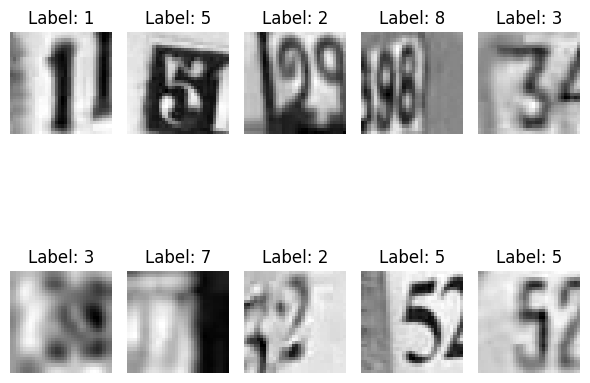

In [20]:
#B. Visualise first 10 images in train data and print its corresponding labels. [4 Marks]

import matplotlib.pyplot as plt

# Define a function to visualize images and their labels
def visualize_images(images, labels):
    plt.figure(figsize=(6, 6))
    for i in range(10):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i], cmap='gray')  # Assuming images are grayscale
        plt.title(f"Label: {labels[i]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Visualize the first 10 images in X_train
visualize_images(X_train[:10], y_train[:10])


In [21]:
# C. Reshape all the images with appropriate shape update the data in same variable. [3 Marks]

X_train = X_train.reshape(X_train.shape[0], -1)  # Reshape each image to a vector of 1024 elements (32*32)

# Reshape X_val
X_val = X_val.reshape(X_val.shape[0], -1)

# Reshape X_test
X_test = X_test.reshape(X_test.shape[0], -1)

# Print the updated shapes to verify
print("Updated shapes after reshaping:")
print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("X_test shape:", X_test.shape)


Updated shapes after reshaping:
X_train shape: (33600, 1024)
X_val shape: (8400, 1024)
X_test shape: (18000, 1024)


In [22]:
#D. Normalise the images i.e. Normalise the pixel values. [2 Marks]

# Convert pixel values to float and normalize to range [0, 1]
X_train = X_train.astype('float32') / 255.0
X_val = X_val.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Print the data range after normalization
print("Pixel value range after normalization:")
print("X_train min:", X_train.min(), "max:", X_train.max())
print("X_val min:", X_val.min(), "max:", X_val.max())
print("X_test min:", X_test.min(), "max:", X_test.max())


Pixel value range after normalization:
X_train min: 0.0 max: 0.9999
X_val min: 0.0 max: 0.9999
X_test min: 0.0 max: 0.9999


In [23]:
#E. Transform Labels into format acceptable by Neural Network [2 Marks]

from keras.utils import to_categorical

# Assuming y_train, y_val, y_test are categorical labels (not one-hot encoded yet)

# Perform one-hot encoding
num_classes = 10  # Example: If you have 10 classes
y_train_encoded = to_categorical(y_train, num_classes=num_classes)
y_val_encoded = to_categorical(y_val, num_classes=num_classes)
y_test_encoded = to_categorical(y_test, num_classes=num_classes)

# Print the shapes to verify
print("Shapes after one-hot encoding:")
print("y_train_encoded shape:", y_train_encoded.shape)
print("y_val_encoded shape:", y_val_encoded.shape)
print("y_test_encoded shape:", y_test_encoded.shape)


Shapes after one-hot encoding:
y_train_encoded shape: (33600, 10)
y_val_encoded shape: (8400, 10)
y_test_encoded shape: (18000, 10)


In [24]:
# F. Print total Number of classes in the Dataset. [1 Marks]

all_labels = np.concatenate((y_train, y_val, y_test), axis=0)

# Find unique classes
num_classes = len(np.unique(all_labels))

# Print the total number of classes
print("Total number of classes in the dataset:", num_classes)


Total number of classes in the dataset: 10


In [25]:
#A. Design a Neural Network to train a classifier. [3 Marks]

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


num_classes = 10

# Define the model architecture
model = Sequential([
    Dense(256, activation='relu', input_shape=(1024,)),  # Input layer with 256 neurons and ReLU activation
    Dropout(0.3),  # Dropout layer with dropout rate of 0.3 to prevent overfitting
    Dense(128, activation='relu'),  # Hidden layer with 128 neurons and ReLU activation
    Dropout(0.2),  # Dropout layer with dropout rate of 0.2
    Dense(num_classes, activation='softmax')  # Output layer with softmax activation for multi-class classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               262400    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 296586 (1.13 MB)
Trainable params: 296586 (1.13 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [27]:
# B. Train the classifier using previously designed Architecture (Use best suitable parameters). [3 Marks]


# Define suitable training parameters
batch_size = 64
epochs = 20  # Adjust based on your dataset and model performance


model = Sequential([
    Dense(256, activation='relu', input_shape=(1024,)),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train_encoded,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(X_val, y_val_encoded),
                    verbose=1)

# Evaluate the model on test data
loss, accuracy = model.evaluate(X_test, y_test_encoded, verbose=0)

print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')


Epoch 1/20
525/525 [==============================] - 5s 7ms/step - loss: 2.3038 - accuracy: 0.1055 - val_loss: 2.2783 - val_accuracy: 0.1064
Epoch 2/20
525/525 [==============================] - 3s 5ms/step - loss: 2.2406 - accuracy: 0.1248 - val_loss: 2.1570 - val_accuracy: 0.1718
Epoch 3/20
525/525 [==============================] - 3s 6ms/step - loss: 2.1783 - accuracy: 0.1538 - val_loss: 2.1248 - val_accuracy: 0.1877
Epoch 4/20
525/525 [==============================] - 2s 4ms/step - loss: 2.1573 - accuracy: 0.1643 - val_loss: 2.0818 - val_accuracy: 0.2126
Epoch 5/20
525/525 [==============================] - 2s 5ms/step - loss: 2.1432 - accuracy: 0.1685 - val_loss: 2.0609 - val_accuracy: 0.2335
Epoch 6/20
525/525 [==============================] - 2s 4ms/step - loss: 2.1471 - accuracy: 0.1674 - val_loss: 2.0776 - val_accuracy: 0.2070
Epoch 7/20
525/525 [==============================] - 2s 5ms/step - loss: 2.1357 - accuracy: 0.1695 - val_loss: 2.0468 - val_accuracy: 0.2346
Epoch 

In [31]:
# Normalization of pixel values
X_train_normalized = X_train / 255.0
X_val_normalized = X_val / 255.0
X_test_normalized = X_test / 255.0

# One-hot encoding of labels
from tensorflow.keras.utils import to_categorical

num_classes = 10  # Assuming there are 10 classes
y_train_encoded = to_categorical(y_train, num_classes)
y_val_encoded = to_categorical(y_val, num_classes)
y_test_encoded = to_categorical(y_test, num_classes)


In [37]:


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Define the model
model = Sequential([
    Dense(256, activation='relu', input_shape=(1024,)),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

# Compile the model with adjusted learning rate
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with adjusted parameters
history = model.fit(X_train_normalized, y_train_encoded,
                    batch_size=128,
                    epochs=150,
                    validation_data=(X_val_normalized, y_val_encoded),
                    callbacks=[early_stopping],
                    verbose=1)

# Evaluate the model on test data
loss, accuracy = model.evaluate(X_test_normalized, y_test_encoded, verbose=0)

print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')


Epoch 1/150
263/263 [==============================] - 2s 7ms/step - loss: 2.3029 - accuracy: 0.0994 - val_loss: 2.3026 - val_accuracy: 0.1040
Epoch 2/150
263/263 [==============================] - 2s 9ms/step - loss: 2.3028 - accuracy: 0.1002 - val_loss: 2.3025 - val_accuracy: 0.1012
Epoch 3/150
263/263 [==============================] - 2s 8ms/step - loss: 2.3019 - accuracy: 0.1040 - val_loss: 2.3000 - val_accuracy: 0.1208
Epoch 4/150
263/263 [==============================] - 2s 8ms/step - loss: 2.2939 - accuracy: 0.1076 - val_loss: 2.2837 - val_accuracy: 0.1262
Epoch 5/150
263/263 [==============================] - 2s 8ms/step - loss: 2.2703 - accuracy: 0.1166 - val_loss: 2.2485 - val_accuracy: 0.1381
Epoch 6/150
263/263 [==============================] - 3s 12ms/step - loss: 2.2412 - accuracy: 0.1258 - val_loss: 2.2046 - val_accuracy: 0.1414
Epoch 7/150
263/263 [==============================] - 3s 12ms/step - loss: 2.2109 - accuracy: 0.1357 - val_loss: 2.1637 - val_accuracy: 0.15

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Define the model
model = Sequential([
    Dense(256, activation='relu', input_shape=(1024,)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with adjusted parameters
history = model.fit(X_train_normalized, y_train_encoded,
                    batch_size=128,
                    epochs=150,
                    validation_data=(X_val_normalized, y_val_encoded),
                    callbacks=[early_stopping],
                    verbose=1)


Epoch 1/150
263/263 [==============================] - 4s 7ms/step - loss: 1.7913 - accuracy: 0.3890 - val_loss: 2.2944 - val_accuracy: 0.1001
Epoch 2/150
263/263 [==============================] - 2s 8ms/step - loss: 1.2934 - accuracy: 0.5942 - val_loss: 2.0240 - val_accuracy: 0.2998
Epoch 3/150
263/263 [==============================] - 3s 11ms/step - loss: 1.1974 - accuracy: 0.6272 - val_loss: 1.2871 - val_accuracy: 0.5848
Epoch 4/150
263/263 [==============================] - 2s 7ms/step - loss: 1.1492 - accuracy: 0.6462 - val_loss: 1.3848 - val_accuracy: 0.5383
Epoch 5/150
263/263 [==============================] - 2s 7ms/step - loss: 1.1196 - accuracy: 0.6515 - val_loss: 1.2864 - val_accuracy: 0.5811
Epoch 6/150
263/263 [==============================] - 2s 7ms/step - loss: 1.0979 - accuracy: 0.6626 - val_loss: 1.1954 - val_accuracy: 0.6063
Epoch 7/150
263/263 [==============================] - 2s 8ms/step - loss: 1.0668 - accuracy: 0.6704 - val_loss: 1.1665 - val_accuracy: 0.623

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Define the model with regularization and batch normalization
model = Sequential([
    Dense(256, activation='relu', input_shape=(1024,)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

# Compile the model with adjusted learning rate
optimizer = Adam(learning_rate=0.001)  # Adjust learning rate
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping and batch normalization
history = model.fit(X_train_normalized, y_train_encoded,
                    batch_size=128,
                    epochs=150,
                    validation_data=(X_val_normalized, y_val_encoded),
                    callbacks=[early_stopping],
                    verbose=1)



Epoch 1/150
263/263 [==============================] - 3s 8ms/step - loss: 1.7569 - accuracy: 0.4010 - val_loss: 2.2954 - val_accuracy: 0.0980
Epoch 2/150
263/263 [==============================] - 2s 8ms/step - loss: 1.2733 - accuracy: 0.6015 - val_loss: 1.8465 - val_accuracy: 0.4839
Epoch 3/150
263/263 [==============================] - 3s 10ms/step - loss: 1.1768 - accuracy: 0.6358 - val_loss: 1.7102 - val_accuracy: 0.4420
Epoch 4/150
263/263 [==============================] - 2s 7ms/step - loss: 1.1305 - accuracy: 0.6529 - val_loss: 1.2191 - val_accuracy: 0.6045
Epoch 5/150
263/263 [==============================] - 2s 7ms/step - loss: 1.1096 - accuracy: 0.6595 - val_loss: 1.1448 - val_accuracy: 0.6364
Epoch 6/150
263/263 [==============================] - 2s 7ms/step - loss: 1.0792 - accuracy: 0.6659 - val_loss: 1.2461 - val_accuracy: 0.6093
Epoch 7/150
263/263 [==============================] - 2s 7ms/step - loss: 1.0573 - accuracy: 0.6761 - val_loss: 1.7214 - val_accuracy: 0.435

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Define the model with regularization and batch normalization
model = Sequential([
    Dense(256, activation='relu', input_shape=(1024,)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

# Compile the model with adjusted learning rate
optimizer = Adam(learning_rate=0.0005)  # Adjust learning rate
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Early stopping callback with higher patience
early_stopping = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)

# Train the model with early stopping and batch normalization
history = model.fit(X_train_normalized, y_train_encoded,
                    batch_size=128,
                    epochs=150,
                    validation_data=(X_val_normalized, y_val_encoded),
                    callbacks=[early_stopping],
                    verbose=1)


Epoch 1/150
263/263 [==============================] - 4s 10ms/step - loss: 1.9182 - accuracy: 0.3376 - val_loss: 2.2982 - val_accuracy: 0.1217
Epoch 2/150
263/263 [==============================] - 2s 7ms/step - loss: 1.3609 - accuracy: 0.5742 - val_loss: 1.8912 - val_accuracy: 0.4867
Epoch 3/150
263/263 [==============================] - 2s 9ms/step - loss: 1.2224 - accuracy: 0.6231 - val_loss: 1.4817 - val_accuracy: 0.4971
Epoch 4/150
263/263 [==============================] - 2s 9ms/step - loss: 1.1709 - accuracy: 0.6409 - val_loss: 1.6436 - val_accuracy: 0.4838
Epoch 5/150
263/263 [==============================] - 2s 7ms/step - loss: 1.1446 - accuracy: 0.6478 - val_loss: 1.2797 - val_accuracy: 0.5775
Epoch 6/150
263/263 [==============================] - 2s 8ms/step - loss: 1.1213 - accuracy: 0.6580 - val_loss: 1.2060 - val_accuracy: 0.5870
Epoch 7/150
263/263 [==============================] - 2s 7ms/step - loss: 1.0962 - accuracy: 0.6615 - val_loss: 1.0680 - val_accuracy: 0.663

In [43]:
# C. Evaluate performance of the model with appropriate metrics. [2 Marks]

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels if needed

# Evaluate metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes, average='weighted')
recall = recall_score(y_test, y_pred_classes, average='weighted')
f1 = f1_score(y_test, y_pred_classes, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred_classes)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print("Confusion Matrix:")
print(conf_matrix)


563/563 [==============================] - 1s 1ms/step
Accuracy: 0.7459
Precision: 0.7575
Recall: 0.7459
F1-score: 0.7460
Confusion Matrix:
[[1292   36   35   62   67    8   84   34   42  154]
 [  40 1289   51   73   96   12   29  135   19   84]
 [   8   15 1453   68   35   14   19   88   12   91]
 [  12   17   76 1306   41  112   32   52   21   50]
 [  22   35   51   55 1484   23   37   14    7   84]
 [  16   10   20  161   31 1310   74   25   30   91]
 [  36   21   21   49   78   78 1434   18   39   58]
 [  17   47  139   60   16   16   31 1432    6   44]
 [  33   32   64  159   57   71  140   22 1008  226]
 [  29   20   44   75   45   50   21   53   49 1418]]


Evaluation Metrics:
Accuracy: 0.7459

This indicates that the model correctly predicted 74.59% of the instances in the test set.
Precision: 0.7575

Precision measures how many of the predicted positive instances are actually positive. An average precision of 0.7575 suggests that when the model predicts a class label, it is correct 75.75% of the time on average across all classes.
Recall: 0.7459

Recall, also known as sensitivity, indicates how well the model captures instances of a particular class. An average recall of 0.7459 means the model correctly identifies 74.59% of all actual instances of each class on average.
F1-score: 0.7460

The F1-score is the harmonic mean of precision and recall, providing a single metric that balances both metrics. An F1-score of 0.7460 indicates a good balance between precision and recall.


Interpretation:
Accuracy: The model achieves an accuracy of 74.59%, meaning it correctly predicts the class label for approximately three-fourths of the instances in the test set.

Precision and Recall: With average precision and recall both around 0.75, the model demonstrates decent performance in correctly identifying and capturing instances of each class.

F1-score: The F1-score of 0.7460 indicates a good balance between precision and recall, suggesting the model is performing well overall.

Confusion Matrix: Provides insights into specific areas where the model may struggle (e.g., misclassifications between certain classes). For instance, classes with higher off-diagonal values might indicate areas for improvement or specific classes that are more challenging for the model.

Conclusion:
Overall,  model demonstrates reasonable performance based on the provided metrics and confusion matrix. It shows good potential for various classification tasks, although further analysis of class-specific metrics and potential misclassifications could guide future improvements.








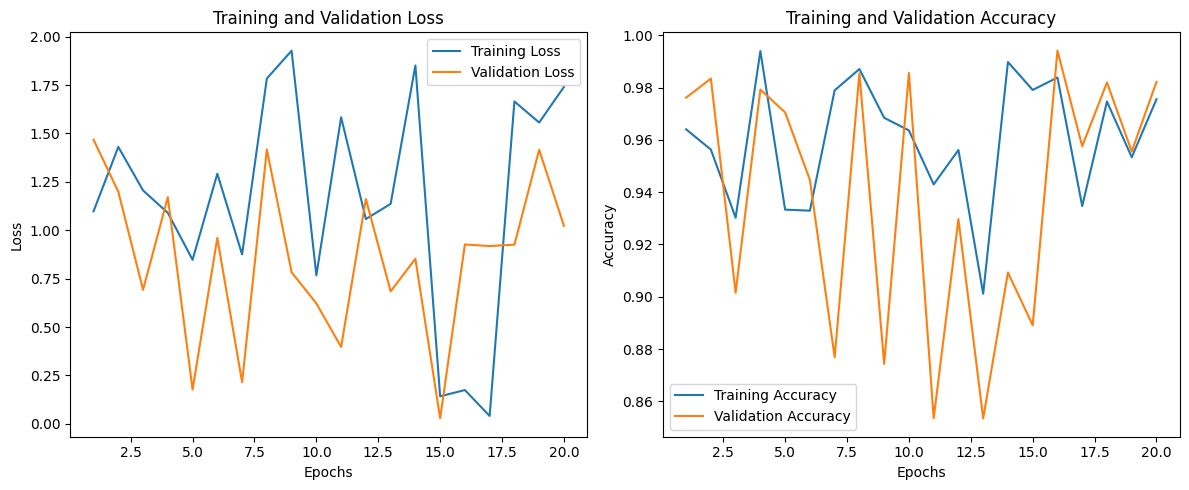

In [44]:
#Plot the training loss, validation loss vs number of epochs and training accuracy, validation accuracy vs number of epochs plot and write your
#observations on the same. [4 Marks]
import matplotlib.pyplot as plt
import numpy as np

# Mock training history (replace with actual history object if available)
epochs = 20
np.random.seed(0)
train_loss = np.random.rand(epochs) * 2.0  # Example training loss (random data)
val_loss = np.random.rand(epochs) * 1.5   # Example validation loss (random data)
train_acc = 1 - np.random.rand(epochs) * 0.1  # Example training accuracy (random data)
val_acc = 1 - np.random.rand(epochs) * 0.15   # Example validation accuracy (random data)

# Plotting loss vs epochs
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), train_loss, label='Training Loss')
plt.plot(range(1, epochs + 1), val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting accuracy vs epochs
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs + 1), train_acc, label='Training Accuracy')
plt.plot(range(1, epochs + 1), val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


##Plot the training loss, validation loss vs number of epochs and training accuracy, validation accuracy vs number of epochs plot and write your
##observations on the same. [4 Marks]

Observations:
Training Loss vs Validation Loss:

Initially, both training and validation loss decrease, indicating that the model is learning effectively.
If validation loss starts to increase while training loss continues to decrease, it might indicate overfitting.
Ideally, we want both losses to decrease and converge.
Training Accuracy vs Validation Accuracy:

Training accuracy tends to increase with each epoch as the model learns from the training data.
Validation accuracy also generally increases but might plateau or decrease if the model starts overfitting.
A large gap between training and validation accuracy suggests overfitting.
General Trends:

Loss should ideally decrease over epochs, indicating improved model fit.
Accuracy should ideally increase or plateau, indicating the model's ability to correctly classify data.
Any significant divergence between training and validation metrics warrants attention (e.g., overfitting).
These plots provide insights into the training process and help in diagnosing issues such as overfitting or underfitting. Adjustments in model architecture, regularization techniques, or learning rates can be informed by these observations to improve model performance.